#TRABAJO UT9: AUTO MACHINE LEARNING

In [ ]:
# Se monta el drive en el colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Preparamos el entorno
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, mean_squared_error
import xgboost as xgb
from copy import deepcopy

#XBOOST REGRESIÓN

In [ ]:
# Importamos el csv
ruta = '/content/drive/MyDrive/CSVs/house_price_madrid.csv'
data = pd.read_csv(ruta,
                      header=0,
                      sep=",",
                      decimal=".",
                      quotechar="\"",
                      encoding='utf-8',
)
data

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighborhood,district
0,495000,planta 1,exterior,3,118.0,True,True,Chopera,Arganzuela
1,485000,planta 2,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela
2,315000,planta 2,exterior,2,72.0,False,False,Legazpi,Arganzuela
3,585000,planta 4,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela
4,255000,bajo,exterior,3,75.0,False,False,Acacias,Arganzuela
...,...,...,...,...,...,...,...,...,...
15970,155000,planta 3,exterior,4,106.0,False,False,Villaverde Alto,villaverde
15971,108000,planta 3,exterior,3,60.0,False,False,San Cristóbal,villaverde
15972,140000,bajo,exterior,2,65.0,False,False,San Cristóbal,villaverde
15973,135000,planta 1,exterior,2,71.0,False,False,Los Rosales,villaverde


In [ ]:
data.dtypes

price             int64
house_type       object
house_type_2     object
rooms             int64
m2              float64
elevator           bool
garage             bool
neighborhood     object
district         object
dtype: object

## ANÁLISIS DE VARIABLES



Variable Objetivo:

* price

Variables Categóricas:

* house_type
* house_type_2
* neighborhood
* district

Variables Numéricas:

* rooms
* m2

Variables Booleanas:

* elevator
* garage

In [ ]:
print('House_type')
print('Count: ', len(data['house_type'].unique()))
print(data['house_type'].unique())
print()
print('neighborhood')
print('Count: ', len(data['neighborhood'].unique()))
print(data['neighborhood'].unique()[1:30])
print()
print('district')
print('Count: ', len(data['district'].unique()))
print(data['district'].unique())
print()
print('House_type_2')
print('Count: ', len(data['house_type_2'].unique()))
print(data['house_type_2'].unique())

House_type
Count:  26
['planta 1' 'planta 2' 'planta 4' 'bajo' 'planta 3' 'planta 6' 'planta 5'
 'planta 8' 'planta 18' 'sotano' 'planta 7' 'planta 12' 'planta -1'
 'semi-sotano' 'entreplanta' 'planta 9' 'planta 11' 'casa' 'chalet'
 'planta 10' 'planta 15' 'planta 13' 'planta 19' 'planta 14' 'planta 16'
 'planta 20']

neighborhood
Count:  341
['Palos de Moguer' 'Legazpi' 'Acacias' 'Delicias' 'Imperial'
 'Dúplex en Legazpi' 'Dúplex en Imperial' 'Ático en Delicias'
 'Alameda de Osuna' 'Campo de las Naciones-Corralejos'
 'Chalet pareado en Campo de las Naciones-Corralejos'
 'Casco Histórico de Barajas' 'Timón'
 'Ático en Campo de las Naciones-Corralejos' 'Aeropuerto'
 'Chalet adosado en Alameda de Osuna' 'Chalet pareado en Alameda de Osuna'
 'Chalet adosado en Campo de las Naciones-Corralejos'
 'Dúplex en Casco Histórico de Barajas'
 'Casa o chalet independiente en Casco Histórico de Barajas' 'Recoletos'
 'Castellana' 'Goya' 'Fuente del Berro' 'Lista' 'Ático en Castellana'
 'Chalet adosad

## VALORES MISSING

In [ ]:
data.isnull().sum()

price             0
house_type        0
house_type_2    469
rooms             0
m2                0
elevator          0
garage            0
neighborhood      0
district          0
dtype: int64

In [ ]:
total_count = len(data)
exterior_count = data['house_type_2'].value_counts().get('exterior', 0)
interior_count = data['house_type_2'].value_counts().get('interior', 0)

exterior_percentage = exterior_count / total_count
interior_percentage = interior_count / total_count
total_percentage = exterior_percentage + interior_percentage
exterior_percentage /= total_percentage
interior_percentage /= total_percentage

# Rellenar los valores nulos en house_type_2 basándose en los porcentajes
data.loc[data['house_type_2'].isnull(), 'house_type_2'] = \
    np.random.choice(['exterior', 'interior'],
                     size=data['house_type_2'].isnull().sum(),
                     p=[exterior_percentage, interior_percentage])


print(data['house_type_2'].isnull().sum())


0


## VARIABLE DUMMY

In [ ]:
data = pd.get_dummies(data, columns=['house_type_2'])
data.head()

,price,house_type,rooms,m2,elevator,garage,neighborhood,district,house_type_2_exterior,house_type_2_interior
0,495000,planta 1,3,118.0,True,True,Chopera,Arganzuela,1,0
1,485000,planta 2,2,82.0,True,True,Palos de Moguer,Arganzuela,1,0
2,315000,planta 2,2,72.0,False,False,Legazpi,Arganzuela,1,0
3,585000,planta 4,2,174.0,True,True,Palos de Moguer,Arganzuela,1,0
4,255000,bajo,3,75.0,False,False,Acacias,Arganzuela,1,0


In [ ]:
data = data.drop('house_type_2_interior', axis=1)

In [ ]:
label_encoder = LabelEncoder()


data['district'] = label_encoder.fit_transform(data['district'])
data['neighborhood'] = label_encoder.fit_transform(data['neighborhood'])
data['house_type'] = label_encoder.fit_transform(data['house_type'])

data.head()

,price,house_type,rooms,m2,elevator,garage,neighborhood,district,house_type_2_exterior
0,495000,5,3,118.0,True,True,124,0,1
1,485000,15,2,82.0,True,True,243,0,1
2,315000,15,2,72.0,False,False,219,0,1
3,585000,18,2,174.0,True,True,243,0,1
4,255000,0,3,75.0,False,False,2,0,1


## NORMALIZACIÓN

In [ ]:
cols = data.columns

for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------price------
Skewness: 4.121787
Kurtosis: 29.460989
------house_type------
Skewness: -0.381989
Kurtosis: -1.432973
------rooms------
Skewness: 2.747774
Kurtosis: 44.330447
------m2------
Skewness: 3.161496
Kurtosis: 14.344261
------elevator------
Skewness: -0.937701
Kurtosis: -1.120857
------garage------
Skewness: 0.989065
Kurtosis: -1.021878
------neighborhood------
Skewness: -0.844689
Kurtosis: -0.796888
------district------
Skewness: 0.376642
Kurtosis: -1.039428
------house_type_2_exterior------
Skewness: -2.521258
Kurtosis: 4.357289


In [ ]:
# Skewness positiva y kurtosis alta
columns_to_normalize = ['m2', 'rooms', 'price']

features = data.drop(columns='price')


In [ ]:
data[columns_to_normalize] = data[columns_to_normalize].apply(lambda x: x + 1e-10 if x.min() == 0 else x)
data[columns_to_normalize] = np.log(data[columns_to_normalize])



data.head()

,price,house_type,rooms,m2,elevator,garage,neighborhood,district,house_type_2_exterior
0,13.112313,5,1.098612,4.770685,True,True,124,0,1
1,13.091904,15,0.693147,4.406719,True,True,243,0,1
2,12.660328,15,0.693147,4.276666,False,False,219,0,1
3,13.279367,18,0.693147,5.159055,True,True,243,0,1
4,12.449019,0,1.098612,4.317488,False,False,2,0,1


In [ ]:

for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------price------
Skewness: 0.532761
Kurtosis: -0.095036
------house_type------
Skewness: -0.381989
Kurtosis: -1.432973
------rooms------
Skewness: -0.389848
Kurtosis: 0.075821
------m2------
Skewness: -0.236054
Kurtosis: 5.560281
------elevator------
Skewness: -0.937701
Kurtosis: -1.120857
------garage------
Skewness: 0.989065
Kurtosis: -1.021878
------neighborhood------
Skewness: -0.844689
Kurtosis: -0.796888
------district------
Skewness: 0.376642
Kurtosis: -1.039428
------house_type_2_exterior------
Skewness: -2.521258
Kurtosis: 4.357289


In [ ]:
#Estandarizamos los datos
scaler = MinMaxScaler()

targets = pd.DataFrame(data['price'])
features = data.drop(columns='price')
features = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=1)

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))

0.2114127361939582


Regresión Lineal simple:
Mean squared error: 0.32

Regresión Lineal múltiple:
Mean squared error: 0.20

Regresión Lineal Polinomial:
Mean squared error: 0.11

SVR:
Mean squared error: 0.13

DecisionTreeRegressor:
Mean squared error: 0.09

DecisionTreeRegressor:
Mean squared error: 0.05

XGBRegressor:
Mean squared error: 0.2114127361939582


Comparando el error cuadrático medio de todas los modelos. Es el peor resultado quitando a la regresión lineal simple.

#XBOOST CLASIFICACIÓN

In [ ]:
# Importamos el csv
ruta = '/content/drive/MyDrive/CSVs/Cancer_Data.csv'
data = pd.read_csv(ruta,
                      header=0,
                      sep=",",
                      decimal=".",
                      quotechar="\"",
                      encoding='utf-8',
)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data.dtypes

## ANÁLISIS DE VARIABLES

Variable Objetivo:
* diagnosis

Variables numéricas:
* radius_mean
* texture_mean
* perimeter_mean
* area_mean
* smoothness_mean
* compactness_mean
* concavity_mean
* concave points_mean
* symmetry_mean
* fractal_dimension_mean
* radius_se
* texture_se
* perimeter_se
* area_se
* smoothness_se
* compactness_se
* concavity_se
* concave points_se
* symmetry_se
* fractal_dimension_se
* radius_worst
* texture_worst
* perimeter_worst
* area_worst
* smoothness_worst
* compactness_worst
* concavity_worst
* concave points_worst
* symmetry_worst
* fractal_dimension_worst



##VALORES MISSING

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## VARIABLE DUMMY


In [ ]:
data = pd.get_dummies(data, columns=['diagnosis'])
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0,1


In [ ]:
data = data.drop('Unnamed: 32', axis=1)

#Borramos la tabla generada por el dummy para no caer en la trampa de la variable dummy
data = data.drop('diagnosis_B', axis=1)
data = data.drop('id', axis=1)

## NORMALIZACIÓN

In [ ]:
cols = data.columns
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------radius_mean------
Skewness: 0.942380
Kurtosis: 0.845522
------texture_mean------
Skewness: 0.650450
Kurtosis: 0.758319
------perimeter_mean------
Skewness: 0.990650
Kurtosis: 0.972214
------area_mean------
Skewness: 1.645732
Kurtosis: 3.652303
------smoothness_mean------
Skewness: 0.456324
Kurtosis: 0.855975
------compactness_mean------
Skewness: 1.190123
Kurtosis: 1.650130
------concavity_mean------
Skewness: 1.401180
Kurtosis: 1.998638
------concave points_mean------
Skewness: 1.171180
Kurtosis: 1.066556
------symmetry_mean------
Skewness: 0.725609
Kurtosis: 1.287933
------fractal_dimension_mean------
Skewness: 1.304489
Kurtosis: 3.005892
------radius_se------
Skewness: 3.088612
Kurtosis: 17.686726
------texture_se------
Skewness: 1.646444
Kurtosis: 5.349169
------perimeter_se------
Skewness: 3.443615
Kurtosis: 21.401905
------area_se------
Skewness: 5.447186
Kurtosis: 49.209077
------smoothness_se------
Skewness: 2.314450
Kurtosis: 10.469840
------compactness_se------
Skewness

In [ ]:
columns_to_normalize = ['area_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'symmetry_se','fractal_dimension_se','area_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst', 'concavity_se']
data[columns_to_normalize] = data[columns_to_normalize].apply(lambda x: x + 1e-10 if x.min() == 0 else x)
data[columns_to_normalize] = np.log(data[columns_to_normalize])

data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,6.908755,0.11840,0.27760,0.3001,0.14710,0.2419,-2.541985,...,17.33,184.60,7.610358,0.1622,-0.407066,0.7119,0.2654,-0.776311,-2.129472,1
1,20.57,17.77,132.90,7.189922,0.08474,0.07864,0.0869,0.07017,0.1812,-2.870510,...,23.41,158.80,7.578657,0.1238,-1.678788,0.2416,0.1860,-1.290984,-2.418894,1
2,19.69,21.25,130.00,7.092574,0.10960,0.15990,0.1974,0.12790,0.2069,-2.813577,...,25.53,152.50,7.443664,0.1444,-0.856843,0.4504,0.2430,-1.018047,-2.435203,1
3,11.42,20.38,77.58,5.956096,0.14250,0.28390,0.2414,0.10520,0.2597,-2.328518,...,26.50,98.87,6.341593,0.2098,-0.143524,0.6869,0.2575,-0.409774,-1.754464,1
4,20.29,14.34,135.10,7.167809,0.10030,0.13280,0.1980,0.10430,0.1809,-2.833103,...,16.67,152.20,7.362011,0.1374,-1.584745,0.4000,0.1625,-1.442230,-2.566811,1


In [ ]:
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------radius_mean------
Skewness: 0.942380
Kurtosis: 0.845522
------texture_mean------
Skewness: 0.650450
Kurtosis: 0.758319
------perimeter_mean------
Skewness: 0.990650
Kurtosis: 0.972214
------area_mean------
Skewness: 0.284957
Kurtosis: -0.112242
------smoothness_mean------
Skewness: 0.456324
Kurtosis: 0.855975
------compactness_mean------
Skewness: 1.190123
Kurtosis: 1.650130
------concavity_mean------
Skewness: 1.401180
Kurtosis: 1.998638
------concave points_mean------
Skewness: 1.171180
Kurtosis: 1.066556
------symmetry_mean------
Skewness: 0.725609
Kurtosis: 1.287933
------fractal_dimension_mean------
Skewness: 0.853573
Kurtosis: 1.295815
------radius_se------
Skewness: 0.572974
Kurtosis: 0.156481
------texture_se------
Skewness: 0.029191
Kurtosis: 0.064204
------perimeter_se------
Skewness: 0.637943
Kurtosis: 0.374893
------area_se------
Skewness: 0.797609
Kurtosis: 0.376066
------smoothness_se------
Skewness: 0.404364
Kurtosis: 0.791833
------compactness_se------
Skewness: -

In [ ]:
sc_X = StandardScaler()
X = data.drop(columns='diagnosis_M')
y= pd.DataFrame(data['diagnosis_M'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1)
xgb_model.fit(X_train_sc, y_train)

# Hacemos una copia para poder hacer pruebas
xgb_model_binary = deepcopy(xgb_model)

In [ ]:
y_pred_class = xgb_model.predict(X_test_sc)

In [ ]:
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class, digits=4))
print(accuracy_score(y_test, y_pred_class))

[[87  3]
 [ 1 52]]
              precision    recall  f1-score   support

           0     0.9886    0.9667    0.9775        90
           1     0.9455    0.9811    0.9630        53

    accuracy                         0.9720       143
   macro avg     0.9670    0.9739    0.9702       143
weighted avg     0.9726    0.9720    0.9721       143

0.972027972027972


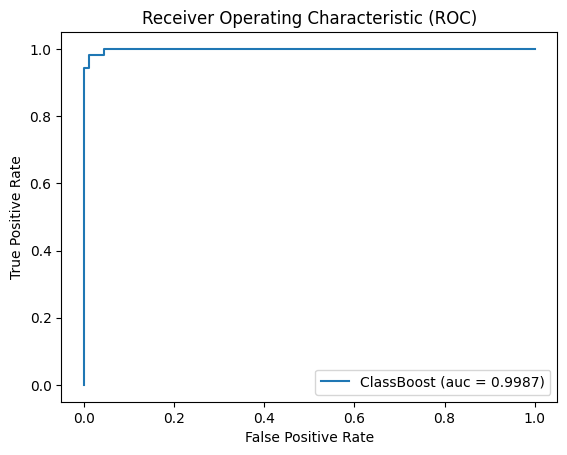

In [ ]:
plt.figure()
y_prob_xboostClass  = xgb_model.predict_proba(X_test_sc)
classifierBoost_fpr, classifierBoost_tpr, threshold = roc_curve(y_test, y_prob_xboostClass[:, 1])
auc_classifierBoost = auc(classifierBoost_fpr, classifierBoost_tpr)
plt.plot(classifierBoost_fpr, classifierBoost_tpr, linestyle='-', label='ClassBoost (auc = %0.4f)' % auc_classifierBoost)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logisregression = LogisticRegression(random_state = 0)
logisregression.fit(X_train_sc, y_train)
y_pred_logisregression  = logisregression.predict(X_test_sc)

classifierK_NN = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifierK_NN.fit(X_train_sc, y_train)
y_pred_K_NN  = classifierK_NN.predict(X_test_sc)

classifierSVC = SVC(kernel = "rbf", probability=True, random_state = 0)
classifierSVC.fit(X_train_sc, y_train)
y_pred_SVC  = classifierSVC.predict(X_test_sc)

classifierSVC_linear = SVC(kernel = "linear", probability=True, random_state = 0)
classifierSVC_linear.fit(X_train_sc, y_train)
y_pred_SVC_lineal  = classifierSVC_linear.predict(X_test_sc)

classifierNaiveBayes = GaussianNB()
classifierNaiveBayes.fit(X_train_sc, y_train)
y_pred_NaiveBayes  = classifierNaiveBayes.predict(X_test_sc)

classifierTree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifierTree.fit(X_train_sc, y_train)
y_pred_classifierTree  = classifierTree.predict(X_test_sc)

classifierRandomForest = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifierRandomForest.fit(X_train_sc, y_train)
y_pred_classifierRandomForest  = classifierRandomForest.predict(X_test_sc)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# CONFUSION MATRIX
print("CONFUSION MATRIX")
print("CONF. MATRX. (Logistic Regression): " )
print( confusion_matrix(y_test, y_pred_logisregression) )
print(" ")
print("CONF. MATRX.  (K_Nearest_Neighbors): ")
print( confusion_matrix(y_test, y_pred_K_NN) )
print(" ")
print("CONF. MATRX.  (Support Vector Machine SVC): ")
print( confusion_matrix(y_test, y_pred_SVC) )
print(" ")
print("CONF. MATRX.  (Naive Bayes): "  )
print( confusion_matrix(y_test, y_pred_NaiveBayes) )
print(" ")
print("CONF. MATRX.  (Classification Decision Tree): " )
print( confusion_matrix(y_test, y_pred_classifierTree) )
print(" ")
print("CONF. MATRX.  (Classification Random Forests): " )
print( confusion_matrix(y_test, y_pred_classifierRandomForest) )
print(" ")
print("CONF. MATRX.  (Classification XGBoost Classifier): " )
print(confusion_matrix(y_test, y_pred_class))
print(" ")

# ACCURACY_SCORE
print("ACCURACY")
print("   ACC (Logistic Regression): %.2f" % accuracy_score(y_test, y_pred_logisregression) )
print("   ACC (K_Nearest_Neighbors): %.2f" % accuracy_score(y_test, y_pred_K_NN) )
print("   ACC (Support Vector Machine SVC): %.2f" % accuracy_score(y_test, y_pred_SVC) )
print("   ACC (Naive Bayes): %.2f" % accuracy_score(y_test, y_pred_NaiveBayes) )
print("   ACC (Classification Decision Tree): %.2f" % accuracy_score(y_test, y_pred_classifierTree) )
print("   ACC (Classification Random Forests): %.2f" % accuracy_score(y_test, y_pred_classifierRandomForest) )
print("   ACC (Classification XGBoost Classifier): %.2f" % accuracy_score(y_test, y_pred_class) )
print(" ")

# CLASSIFICATION_REPORT
print("CLASSIFICATION_REPORT")
print("CLSS_REPORT (Logistic Regression): " )
print( classification_report(y_test, y_pred_logisregression) )
print(" ")
print("CLSS_REPORT (K_Nearest_Neighbors): ")
print( classification_report(y_test, y_pred_K_NN) )
print(" ")
print("CLSS_REPORT (Support Vector Machine SVC): ")
print( classification_report(y_test, y_pred_SVC) )
print(" ")
print("CLSS_REPORT (Naive Bayes): "  )
print( classification_report(y_test, y_pred_NaiveBayes) )
print(" ")
print("CLSS_REPORT (Classification Decision Tree): " )
print( classification_report(y_test, y_pred_classifierTree) )
print(" ")
print("CLSS_REPORT (Classification Random Forests): " )
print( classification_report(y_test, y_pred_classifierRandomForest) )
print(" ")
print("CLSS_REPORT (Classification XGBoost Classifier): " )
print( classification_report(y_test, y_pred_class) )
print(" ")

CONFUSION MATRIX
CONF. MATRX. (Logistic Regression): 
[[85  5]
 [ 1 52]]
 
CONF. MATRX.  (K_Nearest_Neighbors): 
[[88  2]
 [ 4 49]]
 
CONF. MATRX.  (Support Vector Machine SVC): 
[[88  2]
 [ 2 51]]
 
CONF. MATRX.  (Naive Bayes): 
[[83  7]
 [ 5 48]]
 
CONF. MATRX.  (Classification Decision Tree): 
[[86  4]
 [ 2 51]]
 
CONF. MATRX.  (Classification Random Forests): 
[[89  1]
 [ 1 52]]
 
CONF. MATRX.  (Classification XGBoost Classifier): 
[[87  3]
 [ 1 52]]
 
ACCURACY
   ACC (Logistic Regression): 0.96
   ACC (K_Nearest_Neighbors): 0.96
   ACC (Support Vector Machine SVC): 0.97
   ACC (Naive Bayes): 0.92
   ACC (Classification Decision Tree): 0.96
   ACC (Classification Random Forests): 0.99
   ACC (Classification XGBoost Classifier): 0.97
 
CLASSIFICATION_REPORT
CLSS_REPORT (Logistic Regression): 
              precision    recall  f1-score   support

           0       0.99      0.94      0.97        90
           1       0.91      0.98      0.95        53

    accuracy                 

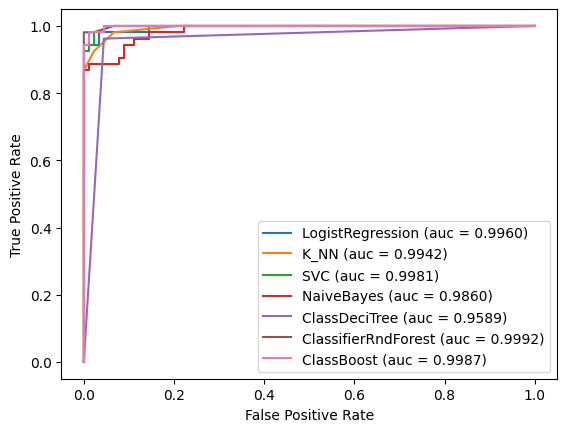

In [ ]:

#fpr = false positive
#tpr = true positive
#threshold = limite

# 1-logisregression
y_prob_logisregression  = logisregression.predict_proba(X_test_sc) #Return probability estimates
logisregression_fpr, logisregression_tpr, threshold = roc_curve(y_test, y_prob_logisregression[:, 1])
auc_logisregressions = auc(logisregression_fpr, logisregression_tpr)
plt.plot(logisregression_fpr, logisregression_tpr, linestyle='-', label='LogistRegression (auc = %0.4f)' % auc_logisregressions)

# 2-K_Nearest_Neighbors
y_prob_KNN  = classifierK_NN.predict_proba(X_test_sc)
KNN_fpr, KNN_tpr, threshold = roc_curve(y_test, y_prob_KNN[:, 1])
auc_KNN = auc(KNN_fpr, KNN_tpr)
plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='K_NN (auc = %0.4f)' % auc_KNN)

# 3-Support Vector Classification
y_prob_SVC  = classifierSVC.predict_proba(X_test_sc)
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, y_prob_SVC[:, 1])
auc_SVC = auc(SVC_fpr, SVC_tpr)
plt.plot(SVC_fpr, SVC_tpr, linestyle='-', label='SVC (auc = %0.4f)' % auc_SVC)

# 4-NaiveBayes
y_prob_NaiveBayes  = classifierNaiveBayes.predict_proba(X_test_sc)
NaiveBayes_fpr, NaiveBayes_tpr, threshold = roc_curve(y_test, y_prob_NaiveBayes[:, 1])
auc_NaiveBayes = auc(NaiveBayes_fpr, NaiveBayes_tpr)
plt.plot(NaiveBayes_fpr, NaiveBayes_tpr, linestyle='-', label='NaiveBayes (auc = %0.4f)' % auc_NaiveBayes)

# 5-Decision Tree for Classification
y_prob_classifierTree  = classifierTree.predict_proba(X_test_sc)
classifierTree_fpr, classifierTree_tpr, threshold = roc_curve(y_test, y_prob_classifierTree[:, 1])
auc_classifierTree = auc(classifierTree_fpr, classifierTree_tpr)
plt.plot(classifierTree_fpr, classifierTree_tpr, linestyle='-', label='ClassDeciTree (auc = %0.4f)' % auc_classifierTree)

# 6-Decision Random Forests for Classification
y_prob_classifierRndForest  = classifierRandomForest.predict_proba(X_test_sc)
classifierRndForest_fpr, classifierRndForest_tpr, threshold = roc_curve(y_test, y_prob_classifierRndForest[:, 1])
auc_classifierRndForest = auc(classifierRndForest_fpr, classifierRndForest_tpr)
plt.plot(classifierRndForest_fpr, classifierRndForest_tpr, linestyle='-', label='ClassifierRndForest (auc = %0.4f)' % auc_classifierRndForest)

#7-XGBoost Classifier for Classification
y_prob_xboostClass  = xgb_model.predict_proba(X_test_sc)
classifierBoost_fpr, classifierBoost_tpr, threshold = roc_curve(y_test, y_prob_xboostClass[:, 1])
auc_classifierBoost = auc(classifierBoost_fpr, classifierBoost_tpr)
plt.plot(classifierBoost_fpr, classifierBoost_tpr, linestyle='-', label='ClassBoost (auc = %0.4f)' % auc_classifierBoost)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

#AUTOSKLEARN

In [ ]:
# install autosklearn
!pip3 install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 17.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 53.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# install dependences
!apt-get install build-essential swig python3-dev
# install autosklearn
!pip3 install auto-sklearn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 38 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,008 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. a

In [ ]:
import autosklearn
print('autosklearn: %s' % autosklearn.__version__)

In [ ]:
!pip install dask distributed --upgrade

In [ ]:
from autosklearn.classification import AutoSklearnClassifier
# from autosklearn.regression import AutoSklearnRegressor # for regression tasks

model = AutoSklearnClassifier(ensemble_kwargs=10, # size of the end ensemble (minimum is 1)
                              time_left_for_this_task=120, #the number of seconds the process runs for
                              per_run_time_limit=30) # maximum seconds allocated per model

model.fit(X_train_sc, y_train) # begin fitting the search model
print(model.sprint_statistics()) # print statistics for the search

In [ ]:
print(model.show_models())

In [ ]:
model.cv_results_

In [ ]:
y_predictions = model.predict(X_test_sc)
y_predictions

In [ ]:
print(confusion_matrix(y_test, y_predictions))
print(classification_report(y_test, y_predictions))
print("General Accuracy score:", accuracy_score(y_test, y_predictions))